In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from random import randint
import math
import cmath

In [3]:
#define kets and bras
ket_0 = np.array([1,0])
ket_1 = np.array([0,1])

In [4]:
#define outer products for operators
c00 = np.outer(ket_0, ket_0)
c01 = np.outer(ket_0, ket_1)
c10 = np.outer(ket_1, ket_0)
c11 = np.outer(ket_1, ket_1)

In [5]:
def discrete_qw(N, coin, shift):
    """Discrete time quantum walk with number of steps N, taking the coin operator C and the shift operator S. Returns a plot of the probabilities""" 
    
    P = 2*N+1 
    c, d = coin
    right, left = shift(P)

    S = np.kron(right, c00) + np.kron(left, c11)
    U = S.dot(np.kron(np.eye(P), c))

    #initialising position and coin states 
    posn_0 = np.zeros(P)
    posn_0[N] = 1
    c_0 = (1/np.sqrt(2))*(ket_0 + ket_1*1j) 
    psi_0 = np.kron(posn_0, c_0)

    #evolution after N steps
    psi_N = np.linalg.matrix_power(U, N).dot(psi_0)

    #make measurement 
    probs = np.empty(P)
    for i in range(P):
        posn = np.zeros(P)
        posn[i] = 1

        M_i = np.kron(np.outer(posn, posn), np.eye(2))
        m = M_i.dot(psi_N)
        probs[i] = m.dot(m.conjugate()).real
    
    #plot probability distribution
    f1 = plt.figure()
    plt.plot(np.arange(P), probs)
    t = 'Discrete time Quantum Walk for %d steps - ' % N
    plt.title(t + d)
    f1.show

In [6]:
def hadamard_coin(): 
    d = 'Hadamard Coin'
    return (1/np.sqrt(2))*(c00 + c01 + c10 - c11), d

In [7]:
def shift_operator(P):
    r = np.roll(np.eye(P), 1, axis=0)
    l = np.roll(np.eye(P), -1, axis=0)
    return r,l

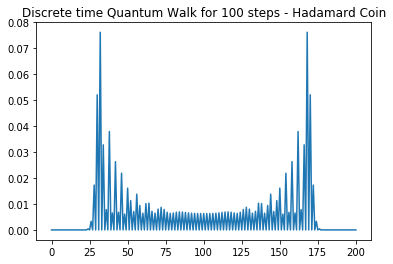

In [9]:
discrete_qw(100, hadamard_coin(), shift_operator)

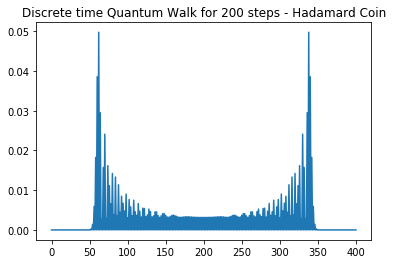

In [10]:
discrete_qw(200, hadamard_coin(), shift_operator)

In [11]:
def rotation_coin(theta):
    a00 = math.cos(theta)
    a01 = -1j*math.sin(theta)
    a10 = -1j*math.sin(theta)
    a11 = math.cos(theta)
    d = 'Rotation Coin, theta = ' + str(theta) 
    return [[a00, a01],[a10, a11]], d

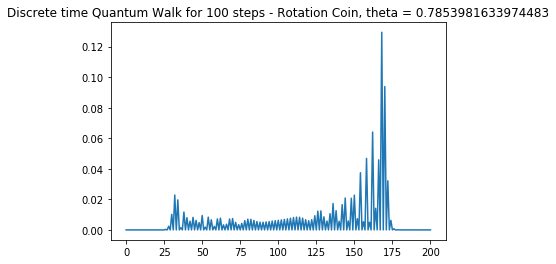

In [15]:
discrete_qw(100, rotation_coin((1/4)*np.pi), shift_operator)

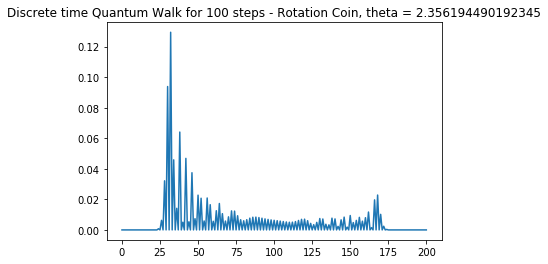

In [16]:
discrete_qw(100, rotation_coin((3/4)*np.pi), shift_operator)